In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from scipy import stats

In [2]:
df= pd.read_csv('/content/Insurance_data.csv')

In [3]:
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,14/05/2010,13/05/2011,Male,30,14/05/2010,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,29/11/2010,28/11/2011,Female,79,29/11/2010,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,21/03/2010,20/03/2011,Male,43,21/03/2010,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,21/08/2010,20/08/2011,Male,2,21/08/2010,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,29/08/2010,31/12/2010,Entity,20,29/08/2010,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [5]:
df.rename(columns={'Policy Start Date':'Policy_Start_Date', 'Policy End Date':'Policy_End_Date', 'First Transaction Date':'First_Transaction_Date'}, inplace=True)

In [6]:
df.columns

Index(['ID', 'Policy_Start_Date', 'Policy_End_Date', 'Gender', 'Age',
       'First_Transaction_Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['ID', 'Policy_Start_Date', 'Policy_End_Date', 'Gender',
       'First_Transaction_Date', 'Car_Category', 'Subject_Car_Colour',
       'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName'],
      dtype='object')


In [8]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
print(numerical_cols)

Index(['Age', 'No_Pol', 'target'], dtype='object')


In [9]:
df.isnull().sum()

,0
ID,0
Policy_Start_Date,0
Policy_End_Date,0
Gender,359
Age,0
First_Transaction_Date,0
No_Pol,0
Car_Category,3738
Subject_Car_Colour,6962
Subject_Car_Make,2476


In [10]:
from scipy import stats

# Replace unrealistic values with NaN
df['Age'] = df['Age'].replace([-2000, # Add any other unrealistic values here
                                 # ...
                                ], np.nan)

# Calculate the median age (or mean if preferred)
median_age = df['Age'].median()

# Impute missing values with the median age
df['Age'] = df['Age'].fillna(median_age)

# Calculate z-scores for 'Age'
df['z_scores'] = stats.zscore(df['Age'])

# Filter out outliers based on z-scores
df = df[(df['z_scores'] > -3) & (df['z_scores'] < 3)]

# Remove the 'z_scores' column if it's no longer needed
df = df.drop(columns=['z_scores'])

In [11]:
# Convert 'Age' column to string type before using .str.replace
df['Age'] = df['Age'].astype(str).str.replace('-', '', regex=False)

# Convert 'Age' column back to numeric type
df['Age'] = pd.to_numeric(df['Age'])

In [12]:
categorical_cols_with_nulls= ['Gender','Car_Category','Subject_Car_Colour','Subject_Car_Make','LGA_Name','State']

In [13]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 6.6 MB/s eta 0:00:00


In [14]:
from feature_engine.imputation import CategoricalImputer

In [15]:
ca= CategoricalImputer(variables=['Gender','Car_Category','Subject_Car_Colour','Subject_Car_Make','LGA_Name','State'],imputation_method='missing')


In [16]:
ca.fit(df)
df = ca.transform(df)

In [17]:
df.head()

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,14/05/2010,13/05/2011,Male,30,14/05/2010,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0
1,ID_0046BNK,29/11/2010,28/11/2011,Female,79,29/11/2010,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1
2,ID_005QMC3,21/03/2010,20/03/2011,Male,43,21/03/2010,1,Saloon,Red,TOYOTA,Missing,Missing,Car Classic,0
3,ID_0079OHW,21/08/2010,20/08/2011,Male,2,21/08/2010,1,Missing,Missing,Missing,Missing,Missing,CarSafe,0
4,ID_00BRP63,29/08/2010,31/12/2010,Entity,20,29/08/2010,3,Missing,Missing,Missing,Lagos,Lagos,Muuve,1


In [18]:
#What is the distribution of the target variable
print(df['target'].describe())
print(df['target'].skew())

count    12076.000000
mean         0.120321
std          0.325350
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64
2.3343549222523188


In [19]:
#Is there a significant relationship between Gender and the target variable?
gender_target_corr = df.groupby('Gender')['target'].mean()
print(gender_target_corr)

Gender
Entity          0.339350
Female          0.107068
Joint Gender    0.098655
Male            0.118419
Missing         0.167131
NO GENDER       0.196970
NOT STATED      0.034483
SEX             0.000000
Name: target, dtype: float64


In [20]:
#How does the Age of the customers correlate with the likelihood of positive or negative outcomes in the target variable?
age_target_corr= df.groupby('Age')['target'].mean()
print(age_target_corr)

Age
0      0.000000
1      0.026087
2      0.140000
3      0.035714
4      0.416667
         ...   
128    0.000000
133    0.000000
140    0.000000
144    0.000000
320    0.083333
Name: target, Length: 101, dtype: float64


In [21]:
#What is the average No_Pol (number of policies) per customer?
average_No_pol= df["No_Pol"].mean()
print(average_No_pol)

1.3071381252070222


In [22]:
#Are there differences in policy outcomes (target) across different ProductName categories?
product_target_corr= df.groupby('ProductName')['target'].mean()
print(product_target_corr)

ProductName
CVTP                0.255864
Car Classic         0.165484
Car Plus            0.211934
Car Vintage         0.000000
CarFlex             0.164773
CarSafe             0.003711
Customized Motor    0.075368
Motor Cycle         0.173913
Muuve               0.698925
Name: target, dtype: float64


In [23]:
#What is the average duration between Policy Start Date and Policy End Date?

df['Policy_Start_Date'] = pd.to_datetime(df['Policy_Start_Date'])
df['Policy_End_Date'] = pd.to_datetime(df['Policy_End_Date'])

# Calculate the duration and average
df['Policy_Duration'] = df['Policy_End_Date'] - df['Policy_Start_Date']
average_duration = df['Policy_Duration'].mean()
print(average_duration)

349 days 13:58:17.449486584


In [24]:
#Is there any seasonal trend in Policy Start Date (e.g., more policies starting during certain months)?
monthly_policy_counts = df.groupby(df['Policy_Start_Date'].dt.month)['Policy_Start_Date'].count()
print(monthly_policy_counts)

Policy_Start_Date
1     1167
2      996
3     1080
4     1108
5      918
6      785
7     1130
8      967
9      939
10    1015
11    1001
12     970
Name: Policy_Start_Date, dtype: int64


In [25]:
#Does the Car_Category affect the outcome of the target variable?
car_category_target_corr= df.groupby('Car_Category')['target'].mean()
print(car_category_target_corr)

Car_Category
Bus                        0.166667
CAMRY CAR HIRE             0.000000
JEEP                       0.122712
Mini Bus                   0.277778
Mini Van                   0.153846
Missing                    0.087282
Motorcycle                 0.117647
Pick Up                    0.266667
Pick Up > 3 Tons           0.000000
Saloon                     0.135068
Sedan                      0.416667
Shape Of Vehicle Chasis    0.333333
Station 4 Wheel            0.000000
Tipper Truck               0.000000
Truck                      0.247423
Van                        0.333333
Wagon                      0.100000
Name: target, dtype: float64


In [26]:
#How does Car_Make (e.g., TOYOTA, etc.) impact policy outcomes?
car_make_target_corr= df.groupby('Subject_Car_Make')['target'].mean()
print(car_make_target_corr)

Subject_Car_Make
.                0.318182
ABG              0.000000
ACURA            0.107692
As Attached      0.454545
Ashok Leyland    0.000000
                   ...   
Volkswagen       0.040984
Volvo            0.216216
Wrangler Jeep    0.000000
Yamaha           0.000000
ZOYTE            0.000000
Name: target, Length: 75, dtype: float64


In [27]:
#Are certain car colors (Subject_Car_Colour) more prone to negative outcomes (i.e., target = 1)?
car_color_target_corr= df.groupby('Subject_Car_Colour')['target'].mean()
print(car_color_target_corr)

Subject_Car_Colour
As Attached       0.233400
Ash               0.218045
B.Silver          0.000000
Beige Mitalic     0.000000
Black             0.150000
Black & Orange    0.000000
Black & White     0.500000
Blue              0.279778
Blue & Red        0.666667
Blue Sky          0.000000
Blue&White&Red    1.000000
Brown             0.086207
Burgundy          0.000000
Champagne         0.000000
Cream             0.125000
D. Gold           0.000000
D. Red            0.000000
Dark Blue         0.000000
Dark Gray         0.200000
Dark Green        0.000000
Dark Grey         0.000000
Dark Red          0.000000
Gold              0.219653
Gray & Gray       0.000000
Gray & Silver     0.000000
Green             0.167382
Grey              0.245136
Light Blue        0.000000
Light Gray        0.000000
Light Green       0.666667
Missing           0.062787
Orange            0.000000
Purple            0.000000
Red               0.235060
Red & Black       0.000000
Red & Blue        0.000000
Red & Whi

In [28]:
#How does the No_Pol (number of policies) correlate with the customer’s age
no_pol_age_corr= df.groupby('No_Pol')['Age'].mean()
print(no_pol_age_corr)

No_Pol
1     42.812089
2     46.820543
3     41.844156
4     67.067961
5     36.791667
6     47.625000
7     93.000000
10    30.000000
Name: Age, dtype: float64


In [29]:
#Does LGA_Name (location) or State influence the target variable?
lga_state_target_corr=df.groupby(['LGA_Name','State'])['target'].mean()
print(lga_state_target_corr)

LGA_Name     State      
 IFAKO       Benue          0.500000
ABULE EGBA   ABULE-EGBA     0.166667
AJAO ESTATE  AJAO-ESTATE    0.000000
AKOKO-EDO    Edo            0.000000
AKUTE        Benue          0.600000
                              ...   
Yaba         Benue          0.105263
Yenagoa      Bayelsa        0.000000
Yorro        Benue          0.000000
Zaria        Kaduna         0.000000
kumbotso     Benue          0.000000
Name: target, Length: 261, dtype: float64


In [30]:
#What is the gender distribution in the dataset, and how does it relate to policy outcomes?
gender_distribution=df['Gender'].value_counts()
print(f'Gender Distribution: {gender_distribution}')

gender_target_corr= df.groupby('Gender')['target'].mean()
print(gender_target_corr)

Gender Distribution: Gender
Male            7617
Female          3325
Missing          359
Entity           277
Joint Gender     223
NOT STATED       174
NO GENDER         66
SEX               35
Name: count, dtype: int64
Gender
Entity          0.339350
Female          0.107068
Joint Gender    0.098655
Male            0.118419
Missing         0.167131
NO GENDER       0.196970
NOT STATED      0.034483
SEX             0.000000
Name: target, dtype: float64


In [31]:
#How many unique car categories are present in the dataset, and what is their distribution?
unique_car_categories=df['Car_Category'].unique()
print(f'Unique Car Categories: {unique_car_categories}')

car_category_distribution=df['Car_Category'].value_counts()
print(f'Car Category Distribution: {car_category_distribution}')

Unique Car Categories: ['Saloon' 'JEEP' 'Missing' 'Motorcycle' 'Truck' 'Bus' 'Mini Bus' 'Pick Up'
 'Mini Van' 'Van' 'Pick Up > 3 Tons' 'CAMRY CAR HIRE' 'Wagon'
 'Shape Of Vehicle Chasis' 'Sedan' 'Station 4 Wheel' 'Tipper Truck']
Car Category Distribution: Car_Category
Saloon                     6034
Missing                    3735
JEEP                       2021
Truck                        97
Bus                          54
Mini Bus                     36
Pick Up                      30
Motorcycle                   17
Mini Van                     13
Sedan                        12
Wagon                        10
Shape Of Vehicle Chasis       6
Station 4 Wheel               5
Van                           3
Pick Up > 3 Tons              1
CAMRY CAR HIRE                1
Tipper Truck                  1
Name: count, dtype: int64


In [32]:
#Does the length of time between the First Transaction Date and Policy End Date affect the outcome?
Policy_duration_target_corr=df['Policy_Duration'].corr(df['target'])
print(Policy_duration_target_corr)

-0.02244609898007231


In [33]:
#Are there any notable differences in policy outcomes between Car Classic, CarSafe, and Muuve?
car_classic_target_corr = df[df['ProductName'] == 'Car Classic']['target'].mean() # Filter for 'Car Classic' first
print(car_classic_target_corr)
car_safe_target_corr = df[df['ProductName'] == 'CarSafe']['target'].mean()
print(car_safe_target_corr)
muuve_target_corr = df[df['ProductName'] == 'MUUVE']['target'].mean()
print(muuve_target_corr)


0.16548426896977175
0.0037105751391465678
nan


In [34]:
#What percentage of the policies were for Saloon cars compared to other categories?
saloon_car_count = (df['Car_Category'] == 'Saloon').sum()
total_cars = df['Car_Category'].count()
saloon_car_percentage = (saloon_car_count / total_cars) * 100

print(f'% polices for saloon cars is ({saloon_car_percentage:.2f}%)')

% polices for saloon cars is (49.97%)


In [36]:
#Are customers with multiple policies (No_Pol > 1) more likely to have certain outcomes?
df['multiple_policies']= df['No_Pol']>1
target_means=df.groupby('multiple_policies')['target'].mean()
print(target_means)

multiple_policies
False    0.108988
True     0.163797
Name: target, dtype: float64


Data visualisation



Text(0, 0.5, 'Count')

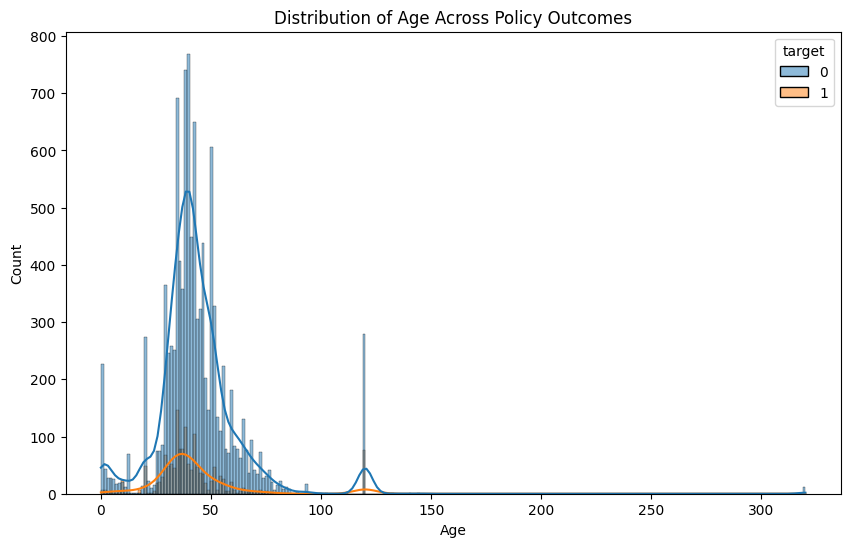

In [37]:
#Can we visualize the distribution of Age across different policy outcomes?
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',hue='target',kde=True)
plt.title('Distribution of Age Across Policy Outcomes')
plt.xlabel('Age')
plt.ylabel('Count')

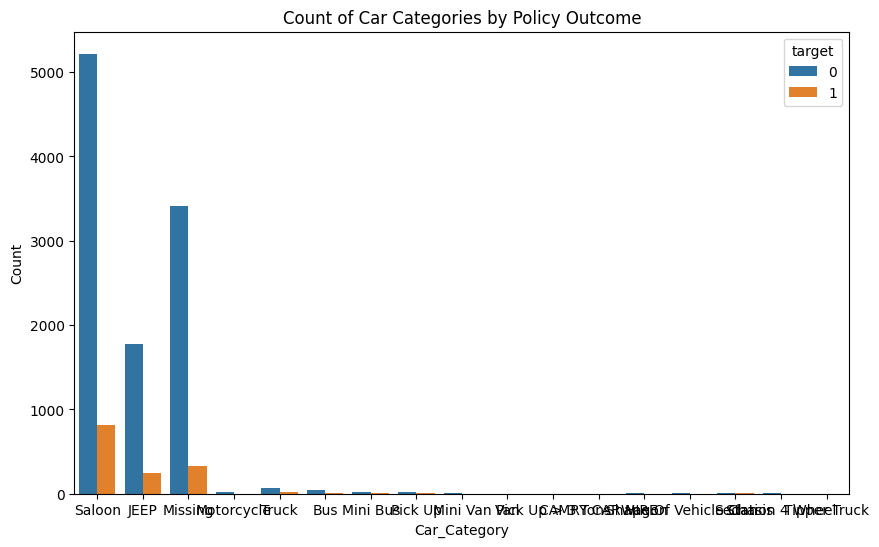

In [52]:
#How does the count of different car categories (Car_Category) break down by policy outcome?
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Car_Category',hue='target')
plt.title('Count of Car Categories by Policy Outcome')
plt.xlabel('Car_Category')
plt.ylabel('Count')
plt.show()

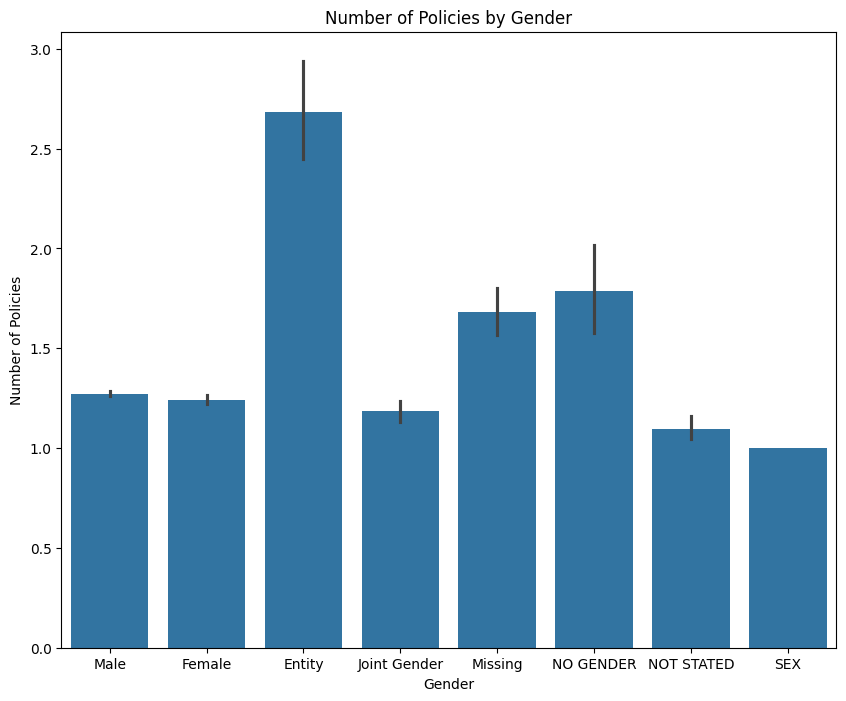

In [39]:
#Can we visualize the number of policies (No_Pol) by Gender?
plt.figure(figsize =(10,8))
sns.barplot(data=df,x='Gender',y='No_Pol')
plt.title('Number of Policies by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Policies')
plt.show()

In [40]:
#What is the monthly trend for the start date of policies (Policy Start Date)?
df['Policy_Start_Month'] = df['Policy_Start_Date'].dt.month
monthly_policy_counts = df.groupby('Policy_Start_Month')['Policy_Start_Month'].count()

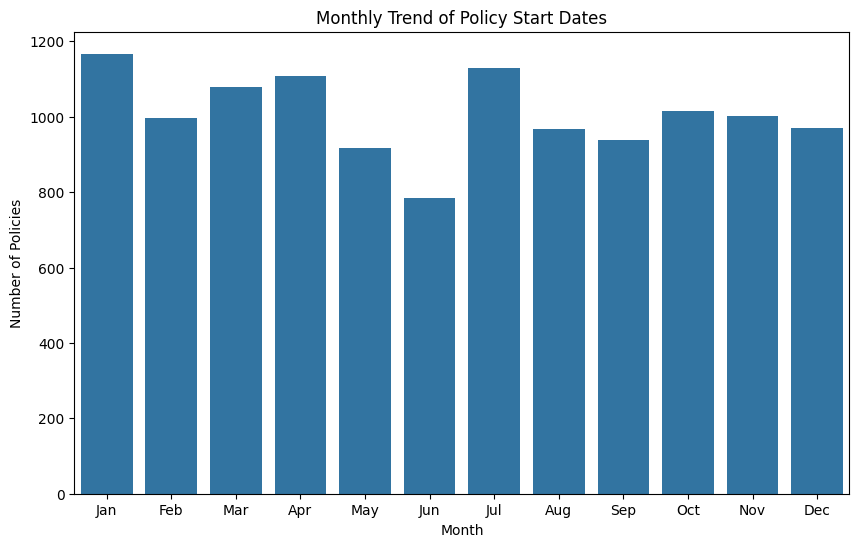

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_policy_counts.index, y=monthly_policy_counts.values)
plt.title('Monthly Trend of Policy Start Dates')
plt.xlabel('Month')
plt.ylabel('Number of Policies')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


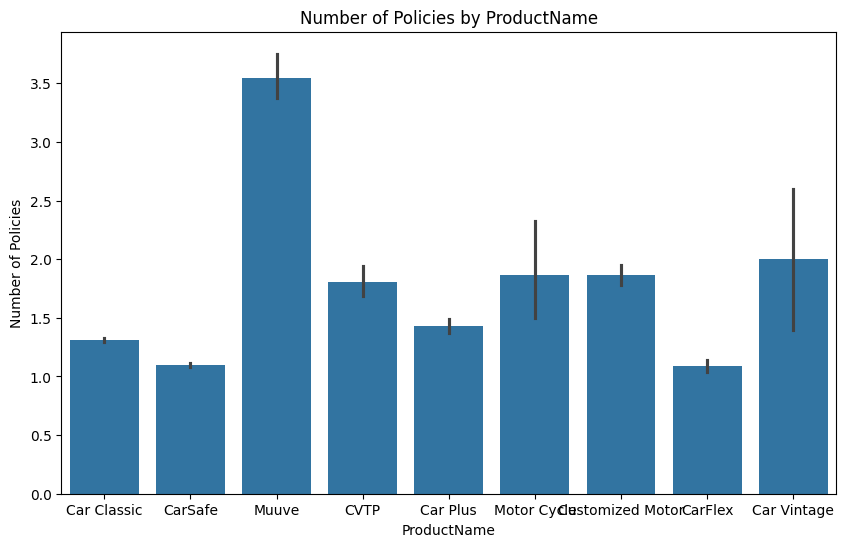

In [42]:
#Can we create a bar chart showing the number of policies by ProductName?
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ProductName', y='No_Pol')
plt.title('Number of Policies by ProductName')
plt.xlabel('ProductName')
plt.ylabel('Number of Policies')
plt.show()

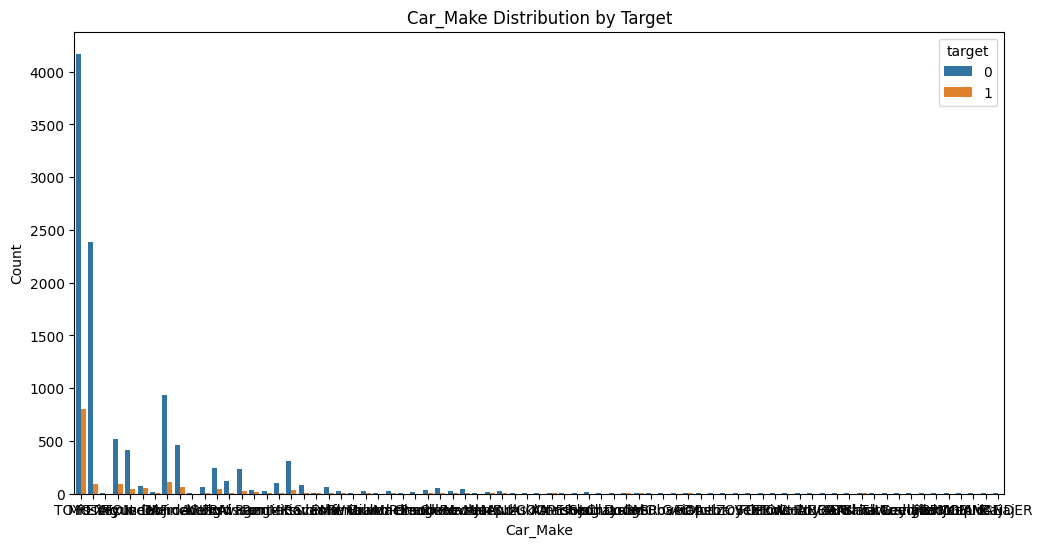

In [43]:
#How does Car_Make distribution vary across the target variable?
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Subject_Car_Make', hue='target')
plt.title('Car_Make Distribution by Target')
plt.xlabel('Car_Make')
plt.ylabel('Count')
plt.show()

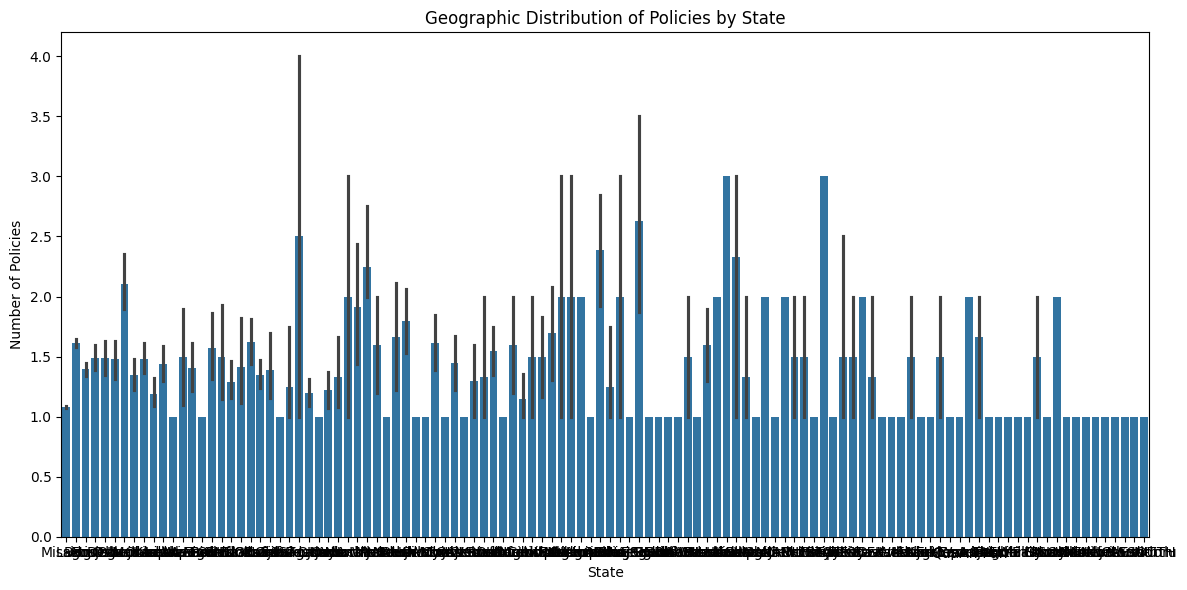

In [44]:
#Can we visualize the geographic distribution of policies by State?
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='No_Pol')
plt.title('Geographic Distribution of Policies by State')
plt.xlabel('State')
plt.ylabel('Number of Policies')
plt.tight_layout()
plt.show()

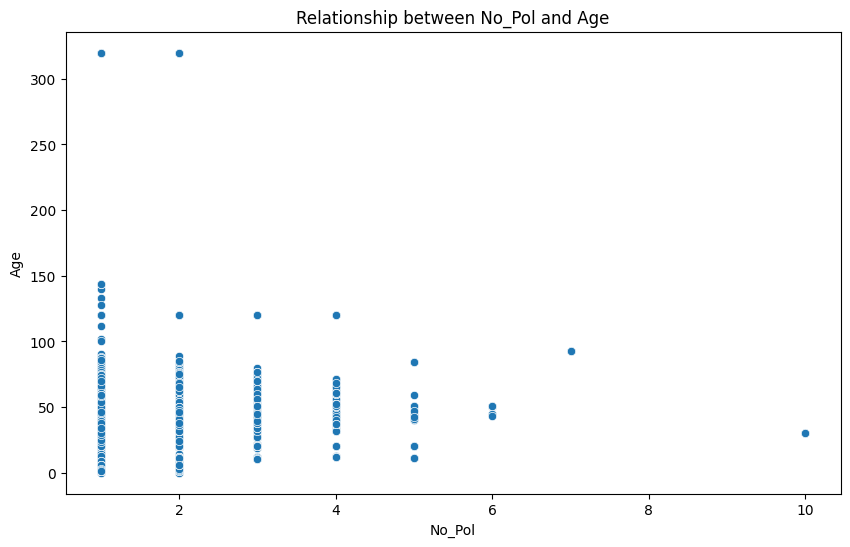

In [45]:
#What is the relationship between No_Pol and Age in a scatter plot?
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='No_Pol',y='Age')
plt.title('Relationship between No_Pol and Age')
plt.xlabel('No_Pol')
plt.ylabel('Age')
plt.show()

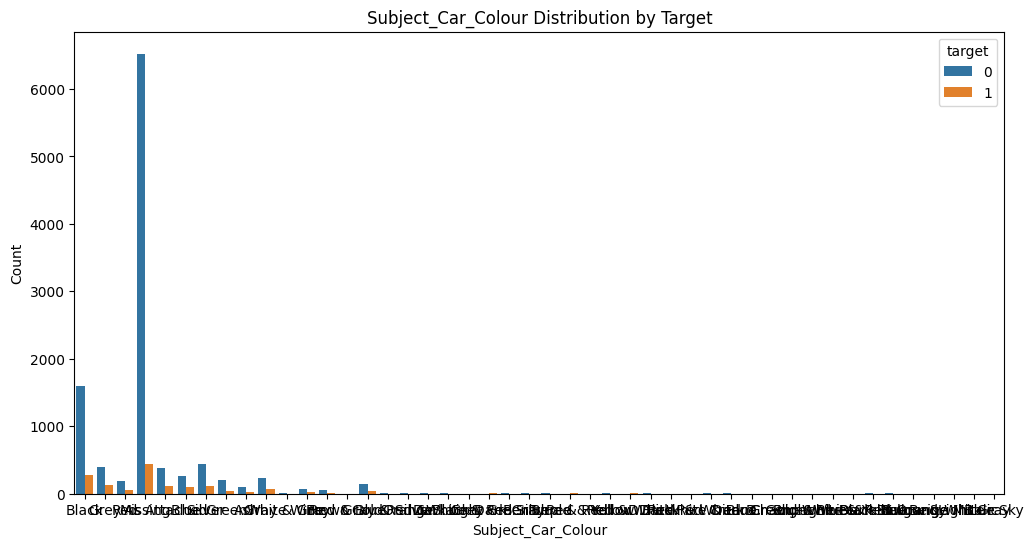

In [46]:
#Can we show a pie chart or bar plot of the target variable’s distribution by Subject_Car_Colour?
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Subject_Car_Colour', hue='target')
plt.title('Subject_Car_Colour Distribution by Target')
plt.xlabel('Subject_Car_Colour')
plt.ylabel('Count')
plt.show()

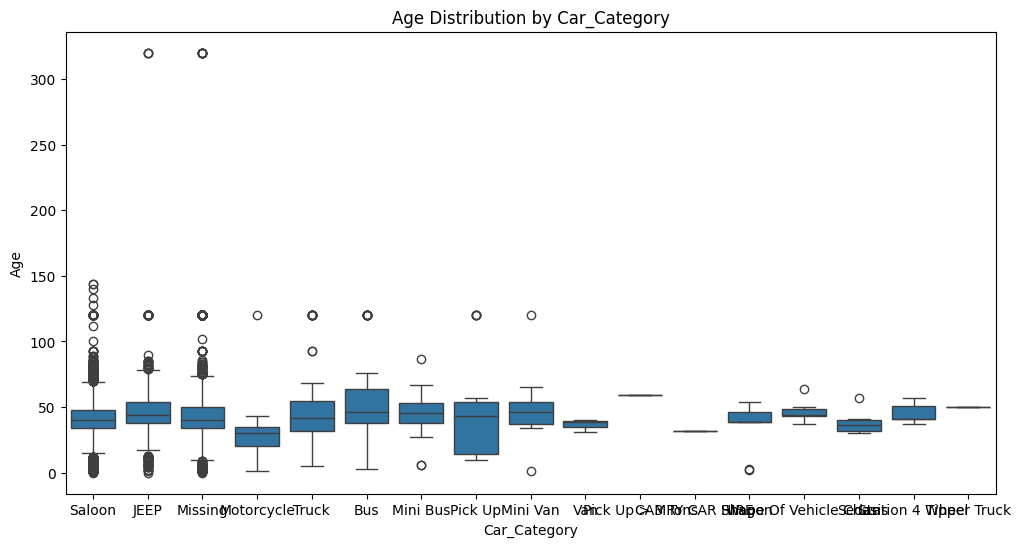

In [47]:
#Can we create a box plot of Age for each car category (Car_Category) to compare age distributions?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Car_Category', y='Age')
plt.title('Age Distribution by Car_Category')
plt.xlabel('Car_Category')
plt.ylabel('Age')
plt.show()